# Ejercicio: Iris Dataset

* El ejercicio puntua un Máximo de 10 puntos.
* Lea el ejercicio detenidamente y realice cada uno de los apartados.
* En caso de duda puede consultar internet para su realización.


1) Realizar el Data Mining del set de datos, representando los distintos datos, si existe si o no correlación, etc.

    Añadir conclusiones observadas de los datos (2 ptos)

2) Realizar el Feature Engineering de los datos para posteriormente realizar el modelo (transformar las columnas necesarias) (2 ptos)

3) Realizar el entrenamiento para los datos realizando la división de los datos de entrenamiento (train) y ensayo (test) (2 ptos)

4) Sacar la exactitud del modelo y la matriz de confusión (2 ptos)

5) Si tenemos una flor con las siguientes mediciones ¿qué tipo de flor sería? (2 ptos)

    SepalLengthCm = 1.2	

    SepalWidthCm = 0.6

    PetalLengthCm = 5.6

    PetalWidthCm = 1.5

*Creado por:*
    
*Isabel Maniega*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("2_IrisSpecies.csv")

# 1.DATA MINING DE LOS DATOS

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.shape

(150, 6)

In [6]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Estamos ante un Dataset con un conjunto de datos que contiene 50 muestras de cada una de las tres especies de una flor llamada Iris: Iris setosa, Iris virginica e Iris versicolor, para cada una de las especies se midio el largo y el ancho del Sepalo y del Petalo. El Dataset tiene 6 columnas con 150 datos, en las primeras tenemos datos flotantes y en la columna 'Species'datos objeto.

In [8]:
#VAMOS A ELIMINAR LA COLUMNA Id QUE NO NOS SIRVE PARA MUCHO.
iris = iris.drop('Id',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# HACEMOS GRAFICOS

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


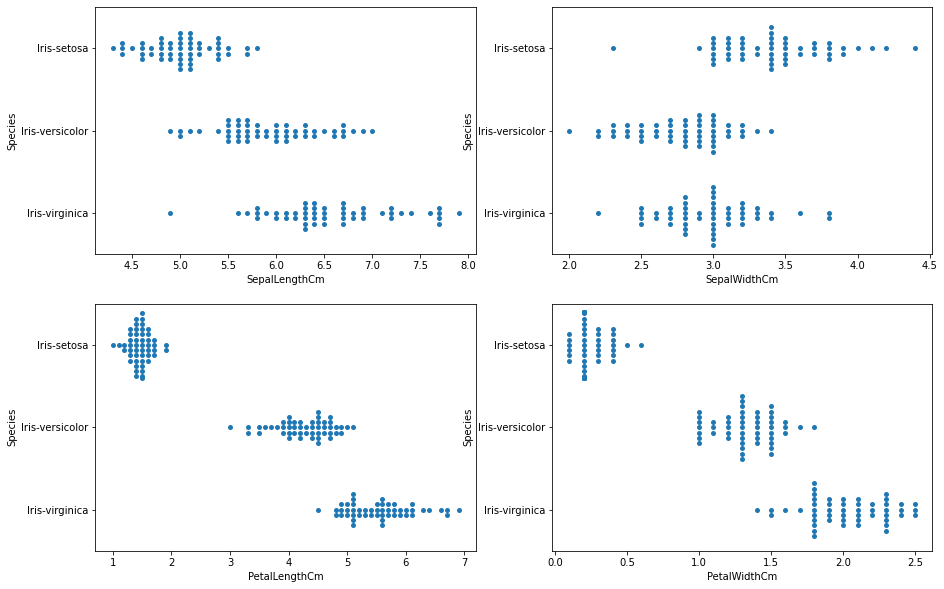

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.swarmplot(iris, x='SepalLengthCm', y="Species")
plt.subplot(2,2,2)
sns.swarmplot(iris, x='SepalWidthCm', y = 'Species')
plt.subplot(2,2,3)
sns.swarmplot(iris, x='PetalLengthCm', y = 'Species')
plt.subplot(2,2,4)
sns.swarmplot(iris, x='PetalWidthCm', y = 'Species')
plt.show()

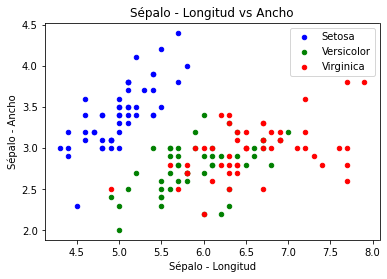

In [10]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

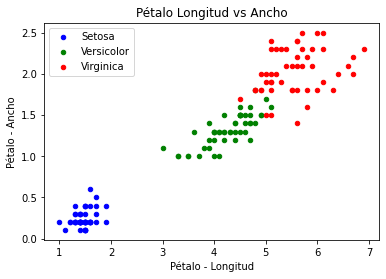

In [11]:
#Grafico Pétalo - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

Hacemos gráficos de tipo dispersión, del largo y ancho del Sépalo y del largo y ancho del Pétalo.
Podemos comprobar que los datos estan distribuidos de manera uniforme sobre todo los de Iris setosa,
mientras que los de Iris Versicolor e Iris Virginica tiene medidas bastante parecidas en el Sépalo, por lo que se solapan,
mientras que en cuanto al Pétalo se distinguen bastante bien aunque tambien se solapan un poco.

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

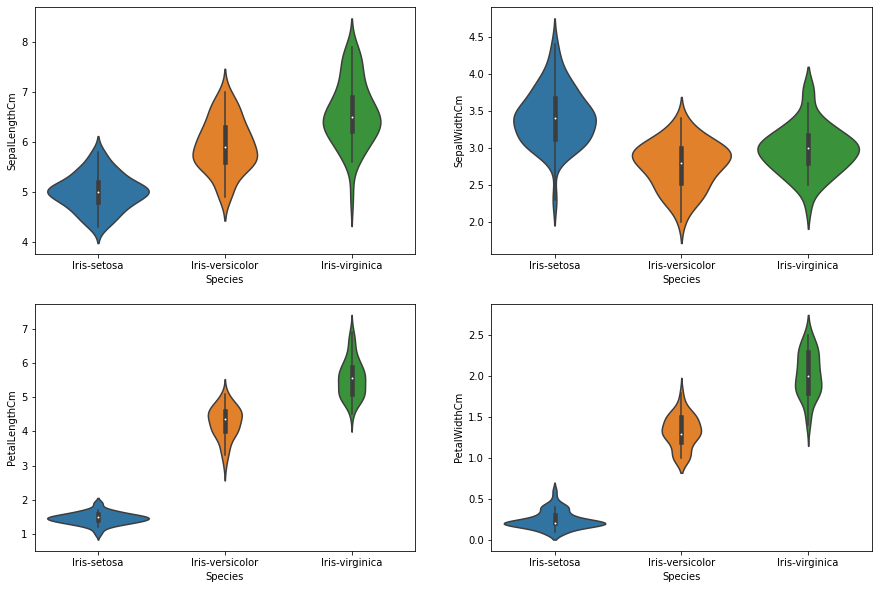

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_5240/1957452194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()


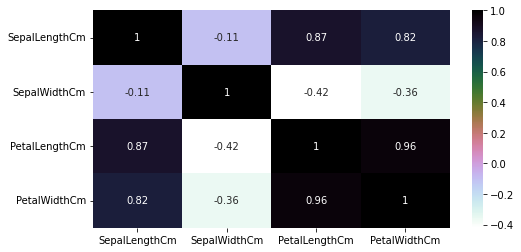

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [14]:
#Aqui podemos ver la correlacion entre las diferente medidas de la flor Iris
iris.corr('spearman')

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_5240/3568787148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr('spearman')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000


Vemos que hay bastante correlacion entre el largo del Sépalo y el largo y ancho del Pétalo y también
entre el largo y ancho del Pétalo.

# Feature Engineering

In [15]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#VAMOS A IMPORTAR LOS DIFERENTES ALGORITMOS DE CLASIFICACIÓN

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [17]:
#Creamos las columnas necesarias, X con las medidas e y con la columna species(Target).
X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_5240/948193417.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(iris.drop(['Species'], 1))


In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [20]:
#SEPARAMOS LOS DATOS PARA ENTRENAMIENTO Y PRUEBA.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Empezamos a aplicar los diferentes algoritmos de Clasificacion.
Este Dataset es claramente para utilizar la Clasificacion, vamos a predecir de que clase de flor Iris
se trata.


In [21]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.975


In [22]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.95


In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
print('Precisión Naive Bayes Clasificación: {}'.format(gnb.score(X_train, y_train)))

Precisión Naive Bayes Clasificación: 0.975


In [24]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Precisión Random Forest Clasificación: {}'.format(clf.score(X_train, y_train)))

Precisión Random Forest Clasificación: 1.0


In [25]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.9833333333333333


In [26]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0


# ************VEMOS QUE EL MODELO DE ARBOLES DE DECISIÓN Y EL RANDOM FOREST  SON LOS  QUE MÁS PRECISIÓN NOS DAN***********

In [27]:
#EXACTITUD DEL MODELO
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud)

Exactitud del modelo:
0.9


In [28]:
#1.Si tenemos una flor con las siguientes mediciones ¿qué tipo de flor sería?

In [29]:
X_now = np.array([[1.2, 0.6, 5.6, 1.5]])
Y_pred = algoritmo.predict(X_now)
print(Y_pred)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

['Iris-virginica']
Precisión Árboles de Decisión Clasificación: 1.0


Vemos que en este caso se trata de una flor Iris de tipo Iris-virginica.

In [30]:
#2.Si tenemos una flor con las siguientes mediciones ¿qué tipo de flor sería?

In [31]:
X_new = np.array([[5, 2.9, 1, 0.2]])
Y_pred = algoritmo.predict(X_new)
print(Y_pred)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

['Iris-setosa']
Precisión Árboles de Decisión Clasificación: 1.0


Vemos que en este caso se trata de una flor Iris de tipo Iris-setosa.

In [32]:
#Importamos confusion_matrix de la libreria Sklearn.

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  6,  0],
       [ 0,  3,  7]])

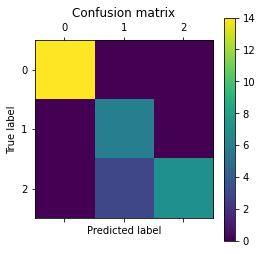

In [35]:

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# CON LOS DATOS ESTANDARIZADOS

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [37]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.975


In [40]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.9916666666666667


In [41]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
print('Precisión Naive Bayes Clasificación: {}'.format(gnb.score(X_train, y_train)))

Precisión Naive Bayes Clasificación: 0.95


In [42]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Precisión Random Forest Clasificación: {}'.format(clf.score(X_train, y_train)))

Precisión Random Forest Clasificación: 1.0


In [43]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.9666666666666667


In [44]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 1.0


# **********ARBOLES DE DECISION Y RANDOMFOREST************************
MEJORES MODELOS DE PREDICCIóN CON 100%

In [45]:
#1.Si tenemos una flor con las siguientes mediciones ¿qué tipo de flor sería?
X_naw = np.array([[1.2, 0.6, 5.6, 1.5]])
Y_pred = algoritmo.predict(X_naw)
print(Y_pred)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

['Iris-virginica']
Precisión Árboles de Decisión Clasificación: 1.0


In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]])

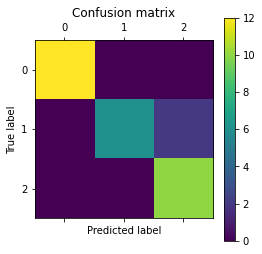

In [47]:
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()